In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Kode ini terdiri dari dua bagian.
1. Emisi total/ GFRAC combined area
asalnya dari proses GFRAC_5_mins_combined_run2.NC yang menggabungkan fraction IR dan RF crops (16) dan grass
lalu di export ke excel (Z:\achaidir\script\stream_2\Additional\GFRACcombined_area_to_excel.py)
sudah menggunanakan CCODE raster yang baru jadi valid

2. Emisi total/ GFRACarea_32_concat.xlsx
asalnya GFRACarea_32.NC (masih IR dan RF terpisah, tanpa grass)
masih menggunakan CCODE yang lama (gpw_v4_national_identifier_grid_rev11_5_min_finall.nc)

In [2]:

df_footprint_region = pd.read_excel("D:/kerja/asisten riset/code v/review/CF_emisi_total_GFRAC_AM1.xlsx")
w_factor_footprint = pd.read_csv("D:/kerja/asisten riset/code v/review/GFRAC_Area_Harvested_combined.csv")

In [3]:
df1b = df_footprint_region.copy()
df3 = w_factor_footprint.copy()

In [4]:
df1b = df1b.rename(columns={'type': 'NGFBFC'})
df1b['CF'] = df1b['CF'].replace([np.inf, -np.inf], np.nan)
df1b['CF'] = df1b['CF'].fillna(0)

In [5]:
df1b.loc[df1b['CF'] > 50, 'CF'] = 0
df1b['NGFBFC'] = df1b['NGFBFC'].str.lower()
df1b['NGFBFC'] = df1b['NGFBFC'].str.replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')

In [6]:
df3_copy = df3.rename(columns={'type': 'NGFBFC'})
df3_copy['NGFBFC'] = df3_copy['NGFBFC'].str.lower()
df3_copy['NGFBFC'] = df3_copy['NGFBFC'].str.replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
df3_copy

,IMAGE Region Name,NGFBFC,time,value
0,Brazil,maize,1970,1.129294e+07
1,Brazil,maize,1975,1.208552e+07
2,Brazil,maize,1980,1.078206e+07
3,Brazil,maize,1985,1.065404e+07
4,Brazil,maize,1990,1.301961e+07
...,...,...,...,...
4571,W. Europe,wheat,2000,1.779400e+07
4572,W. Europe,wheat,2005,1.769292e+07
4573,W. Europe,wheat,2010,1.770521e+07
4574,W. Europe,wheat,2015,1.750669e+07


In [19]:
#Area Harvested
# df3_melted_region_columns = df3_melted_region[['country', 'IMAGE Region Name', 'type', 'time', 'value']]

df3_melted_region_columns_groupby = df3_copy.groupby(['IMAGE Region Name','NGFBFC', 'time']).sum()
df3_melted_region_index = df3_melted_region_columns_groupby.reset_index()
df3_melted_region_index[df3_melted_region_index['time'] > 1970]

,IMAGE Region Name,NGFBFC,time,value
1,Brazil,maize,1975,1.208552e+07
2,Brazil,maize,1980,1.078206e+07
3,Brazil,maize,1985,1.065404e+07
4,Brazil,maize,1990,1.301961e+07
5,Brazil,maize,1995,1.577528e+07
...,...,...,...,...
4571,W. Europe,wheat,2000,1.779400e+07
4572,W. Europe,wheat,2005,1.769292e+07
4573,W. Europe,wheat,2010,1.770521e+07
4574,W. Europe,wheat,2015,1.750669e+07


In [16]:
data1 = np.zeros((10, 16, 26), dtype='float32')
average_AreaHarvested_RegionCrops = np.zeros((10, 16, 26), dtype='float32')
result_average = np.zeros((16, 10), dtype='float32')

for n, time in enumerate(range(1975, 2021, 5)):
    for i, ngfbfc in enumerate(df1b['NGFBFC'].unique()):
        for j, image_region in enumerate(df3_melted_region_index['IMAGE Region Name'].unique()):
            ngfbfc_areaharves = df3_melted_region_index[(df3_melted_region_index['time'] == time) & (df3_melted_region_index['IMAGE Region Name'] == image_region) & (df3_melted_region_index['NGFBFC'] == ngfbfc)]['value'].replace([np.inf, -np.inf], np.nan).values
            average_AreaHarvested_RegionCrops[n][i][j] = np.nan_to_num(ngfbfc_areaharves)


In [ ]:
for n, time in enumerate(range(1975, 2021, 5)):
    for i, ngfbfc in enumerate(df1b['NGFBFC'].unique()):
        carbon_footprint = df1b[(df1b['time'] == time) & (df1b['NGFBFC'] == ngfbfc)]['CF'].replace([np.inf, -np.inf], np.nan).values
        data1[n][i] = np.nan_to_num(carbon_footprint)

In [13]:
for x in range(0, 16):    
    for n, time in enumerate(range(1975, 2021, 5)):
        result_average[x][n] = np.average(data1[n][x], weights=average_AreaHarvested_RegionCrops[n][x])

result_average

array([[ 5.98503   ,  5.057563  ,  7.8464212 ,  9.372237  ,  2.8158846 ,
         3.6740668 ,  4.045695  ,  4.4841847 ,  3.7504609 ,  4.7344193 ],
       [ 4.975382  , 10.2576    , 24.002903  , 16.149107  , 10.099913  ,
         7.34608   , 10.7462015 , 11.693826  ,  7.086656  , 17.705086  ],
       [12.670419  ,  6.327477  , 16.14938   , 10.90033   ,  5.336238  ,
         7.560454  ,  8.677483  ,  6.1160607 ,  9.042583  , 11.59324   ],
       [ 1.1530218 ,  1.1515458 ,  1.2506186 ,  1.5288033 ,  2.9602578 ,
         0.6131121 ,  1.8302138 ,  1.074719  ,  0.33021724,  2.1769233 ],
       [ 7.0133867 ,  4.4629683 ,  7.360429  ,  4.503165  ,  2.920193  ,
         3.3763378 ,  2.4773736 ,  1.5165963 ,  1.206763  ,  4.0125475 ],
       [ 8.322495  ,  6.726329  ,  5.864063  ,  4.5185213 ,  3.162484  ,
         3.3345468 ,  4.634043  ,  3.9774525 ,  2.0051787 ,  3.514959  ],
       [ 4.7656455 ,  6.4120617 ,  4.1349664 ,  3.1243434 ,  2.4038112 ,
         1.3075581 ,  1.2651117 ,  4.2611732 

In [14]:
# index=[df3_melted_region_index['time'].unique()]
df_avg = pd.DataFrame(result_average, index=[df3_melted_region_index['NGFBFC'].unique()], columns=list(range(1975, 2021, 5)))
df_avg = df_avg.reset_index()
df_avg = df_avg.rename(columns={"level_0":'NGFBFC'})
df_avg_melt = pd.melt(
    df_avg, 
    id_vars=["NGFBFC"],  # Kolom yang tetap
    var_name="time",     # Nama kolom untuk nilai tahun
    value_name="value"   # Nama kolom untuk nilai data
)
df_avg = df_avg_melt.sort_values(by=['value', 'NGFBFC'], ascending=[False, False])

results = {}

for category in df_avg['NGFBFC'].unique():
    for time in range(1975, 2021, 5):
        filtered_data = df_avg[(df_avg['NGFBFC'] == category) & (df_avg['time'] == time)]
        sorted_data = filtered_data.sort_values(by='value', ascending=False)
        top_5_data = sorted_data.head(3)
        if time not in results:
            results[time] = {}
        results[time][category] = top_5_data

df_avg = pd.concat([pd.concat(results[year].values()) for year in results.keys()])
df_avg = df_avg.sort_values(by=['time', 'value'], ascending=[True, False])
df_avg['NGFBFC'] = df_avg['NGFBFC'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
df_avg[df_avg['time'] == 1975]

,NGFBFC,time,value
2,palm oil,1975,12.670419
13,tropical roots & tubers,1975,10.900868
12,tropical oil crops,1975,10.653925
5,rice,1975,8.322495
4,pulses,1975,7.013387
8,temperate cereals,1975,6.678858
0,maize,1975,5.985030
14,vegetables & fruits,1975,5.532052
1,"non food, luxury, spices",1975,4.975382
6,soybeans,1975,4.765646


In [371]:
produk_diulang = np.array([item for item in df_avg[df_avg['time'] == 1980]['NGFBFC'].to_list() for _ in range(1)])
produk_diulang

array(['non food, luxury, spices', 'temperate cereals',
       'tropical roots & tubers', 'rice', 'soybeans', 'palm oil',
       'sugar crops', 'vegetables & fruits', 'maize',
       'temperate oil crops', 'pulses', 'tropical cereals',
       'tropical oil crops', 'temperate roots & tubers',
       'plant based fibres', 'wheat'], dtype='<U24')

In [372]:
df_footprint_region = df1b.replace([np.inf, -np.inf], np.nan).fillna(0)
df_footprint_region['NGFBFC'] = df_footprint_region['NGFBFC'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Kazakhstan region', 'Central Asia').replace('C. Europe', 'Central Europe').replace('E. Africa', 'Eastern Africa').replace('N. Africa', 'Northern Africa')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Rest C. America', 'Central America').replace('Rest S. Africa', 'Rest of Southern Africa').replace('Rest S. America', 'Rest of South America')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Rest S. Asia', 'Rest of South Asia').replace('SE. Asia', 'Southeast Asia').replace('Rest S. America', 'Rest of South America')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('W. Africa', 'Western Africa').replace('W. Europe', 'Western Europe').replace('Russia', 'Russia region')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Indonesia', 'Indonesia region').replace('China', 'China region').replace('Korea', 'Korea region')

df_footprint_region_table = pd.pivot_table(data=df_footprint_region, index=['NGFBFC', 'time'], columns=['IMAGE Region Name'])
df_footprint_region_index = df_footprint_region_table.stack(level=0, future_stack=True)
df_footprint_region_index = df_footprint_region_index.reset_index()
df_footprint_region_index_drop = df_footprint_region_index.drop(columns=['level_2'])
df_footprint_region_index_drop.index = df_footprint_region_index_drop['NGFBFC'].values
df_footprint_region_index_drop.head()

IMAGE Region Name,NGFBFC,time,Brazil,Canada,Central America,Central Asia,Central Europe,China region,Eastern Africa,India,...,Rest of South Asia,Rest of Southern Africa,Russia region,South Africa,Southeast Asia,Turkey,USA,Ukraine region,Western Africa,Western Europe
maize,maize,1975,34.680581,0.483230,0.000000,0.259722,0.399051,0.239017,7.209285,0.563111,...,0.389331,4.925998,0.000810,0.846022,38.683077,3.467344,0.614504,0.173275,0.098296,0.653312
maize,maize,1975,1.000000,353.000000,2465.000000,1409.000000,177.000000,529.000000,705.000000,881.000000,...,2993.000000,2641.000000,3169.000000,3521.000000,3345.000000,3697.000000,3873.000000,4049.000000,4225.000000,4401.000000
maize,maize,1980,18.238775,0.561505,42.488248,0.155879,0.024928,1.890305,1.230959,0.024362,...,0.371765,6.238034,0.443769,0.629678,46.453531,0.095972,0.395549,0.176090,0.108859,1.294331
maize,maize,1980,2.000000,354.000000,2466.000000,1410.000000,178.000000,530.000000,706.000000,882.000000,...,2994.000000,2642.000000,3170.000000,3522.000000,3346.000000,3698.000000,3874.000000,4050.000000,4226.000000,4402.000000
maize,maize,1985,13.753878,0.769705,49.645223,1.055925,0.010898,12.709082,0.612193,0.068483,...,0.640245,6.727240,4.547081,0.400875,32.304195,0.021354,0.887606,1.668764,20.917242,0.482641


In [373]:
def custom_mean(x):
  """Calculates the mean of non-zero values."""
  non_zero_values = x[x > 0]
  return non_zero_values.sum() / len(non_zero_values) if len(non_zero_values) > 0 else 0
  
average1_melt = df_footprint_region_index_drop.melt(id_vars=['NGFBFC', 'time'], value_name='value') 
average1_melt = average1_melt[~((average1_melt['IMAGE Region Name'] == "Canada"))]
average1_melt = average1_melt[~((average1_melt['IMAGE Region Name'] == "Central America"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "tropical cereals") & 
                                      (average1_melt['IMAGE Region Name'] == "Japan"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "palm oil") & 
                                      (average1_melt['IMAGE Region Name'] == "South Africa"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "palm oil") & 
                                      (average1_melt['IMAGE Region Name'] == "Rest of Southern Africa"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "palm oil") & 
                                      (average1_melt['IMAGE Region Name'] == "USA"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "non food, luxury, spices") & 
                                      (average1_melt['IMAGE Region Name'] == "Russia region"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "soybeans") & 
                                      (average1_melt['IMAGE Region Name'] == "Southeast Asia"))]
average1_melt

,NGFBFC,time,IMAGE Region Name,value
0,maize,1975,Brazil,34.680581
1,maize,1975,Brazil,1.000000
2,maize,1980,Brazil,18.238775
3,maize,1980,Brazil,2.000000
4,maize,1985,Brazil,13.753878
...,...,...,...,...
8315,wheat,2010,Western Europe,4573.000000
8316,wheat,2015,Western Europe,0.186804
8317,wheat,2015,Western Europe,4574.000000
8318,wheat,2020,Western Europe,1.063918


In [374]:
average1_melt.index = average1_melt['NGFBFC'].values
average1_filtered = average1_melt[average1_melt['value'] < 20]

results = {}
average1_new = average1_filtered.sort_values(by=['value', 'NGFBFC'], ascending=[True, True])

for country in average1_new['IMAGE Region Name'].unique():
    for category in average1_new['NGFBFC'].unique():
        for time in range(1975, 2021, 5):
            filtered_data = average1_new[(average1_new['NGFBFC'] == category) & (average1_new['time'] == time)]
            sorted_data = filtered_data.sort_values(by='value', ascending=False)
            top_5_data = sorted_data.head(3)
            if time not in results:
                results[time] = {}
            results[time][category] = top_5_data

df_footprint_df = pd.concat([pd.concat(results[year].values()) for year in results.keys()])
df_footprint_df_filtered = df_footprint_df[df_footprint_df['value'] < 20]
df_footprint_df_filtered

,NGFBFC,time,IMAGE Region Name,value
maize,maize,1975,Eastern Africa,7.209285
maize,maize,1975,Rest of South America,6.759901
maize,maize,1975,Rest of Southern Africa,4.925998
"non food, luxury, spices","non food, luxury, spices",1975,Eastern Africa,18.654870
"non food, luxury, spices","non food, luxury, spices",1975,Rest of South America,12.743647
...,...,...,...,...
vegetables & fruits,vegetables & fruits,2020,Southeast Asia,13.692689
vegetables & fruits,vegetables & fruits,2020,Western Africa,13.432281
wheat,wheat,2020,Rest of Southern Africa,16.593607
wheat,wheat,2020,Eastern Africa,15.118664


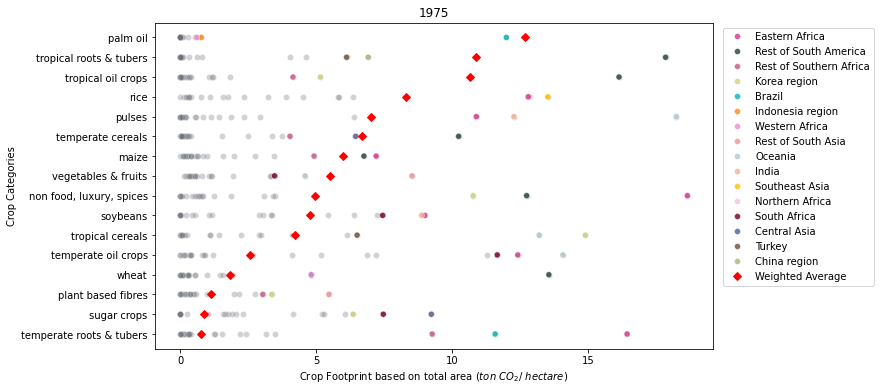

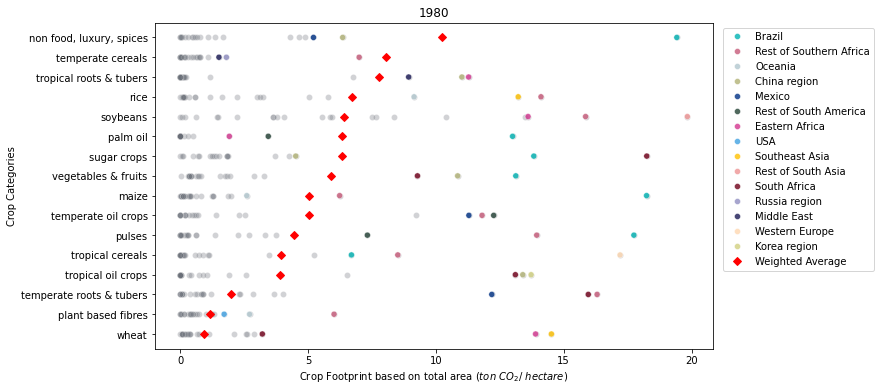

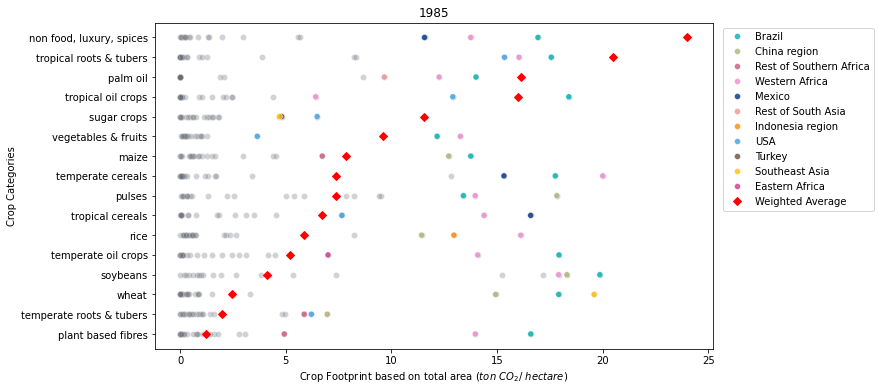

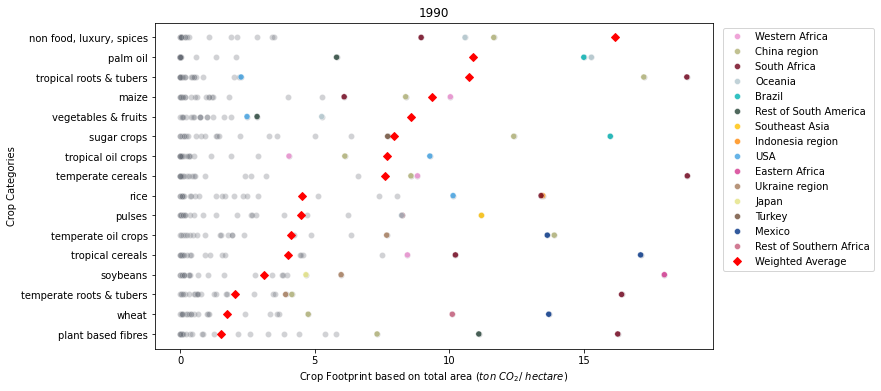

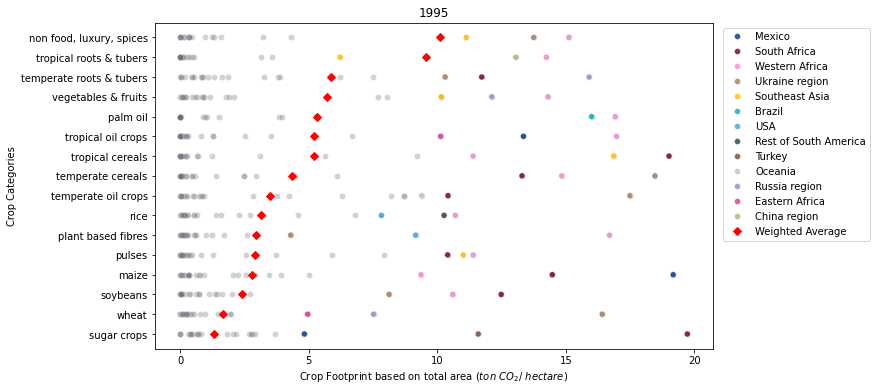

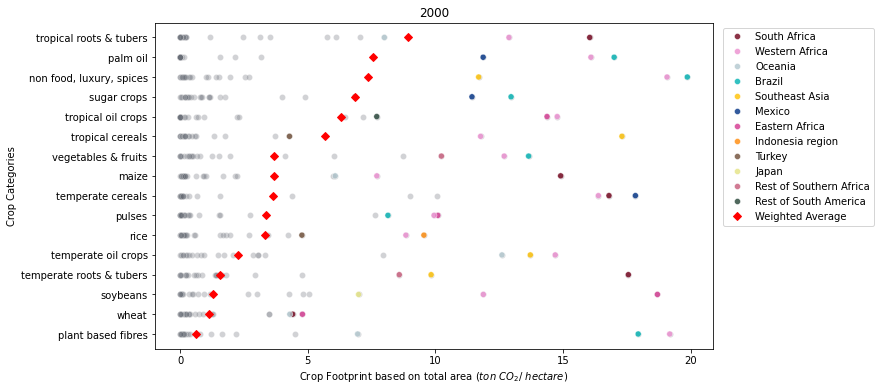

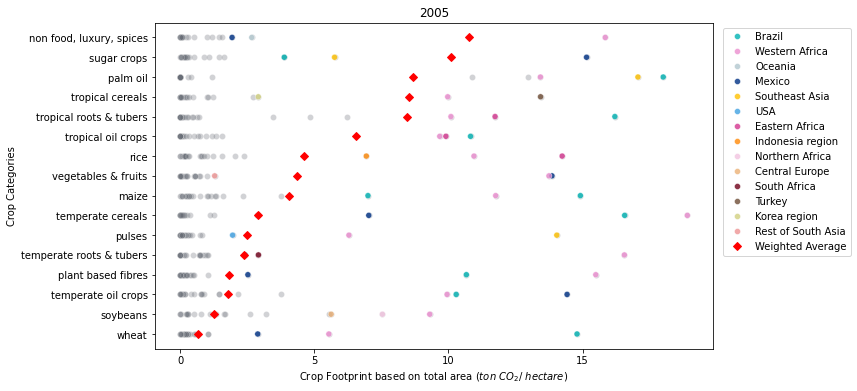

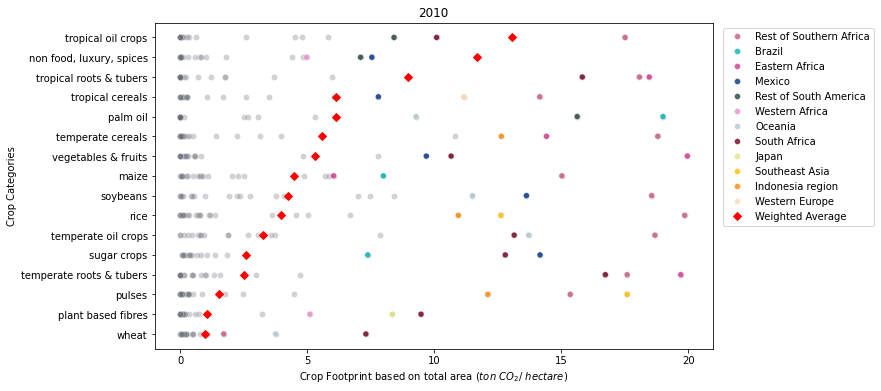

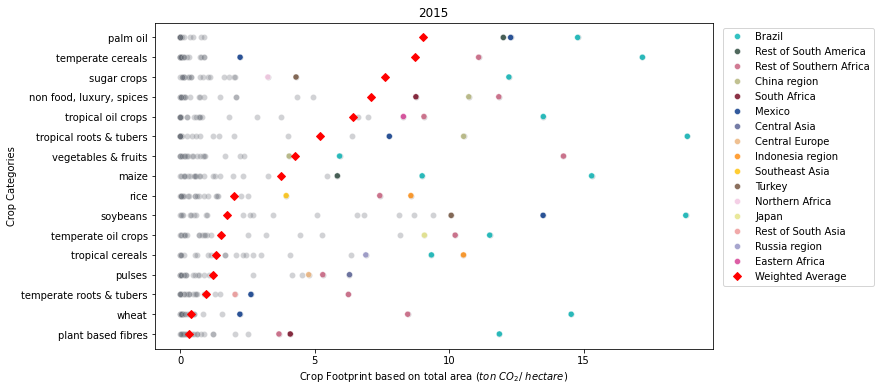

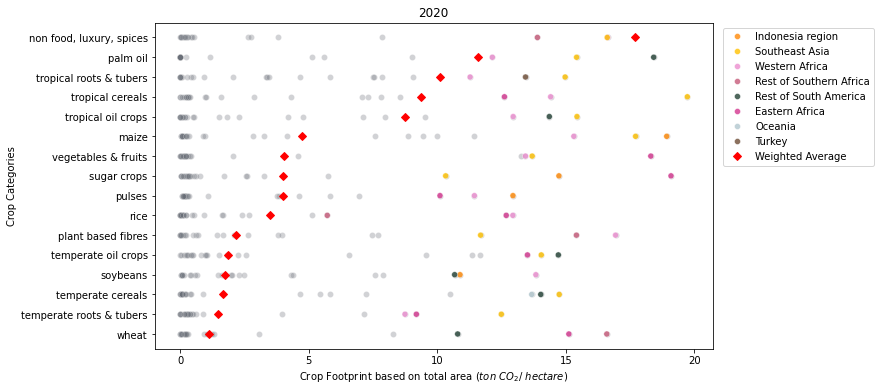

In [375]:
from scipy.interpolate import make_interp_spline
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import MultipleLocator

palettes = {'Oceania': '#B3C8CF','Japan':'#E5E483','Korea region':'#D2D180','China region':'#B2B377','Rest of South Asia':'#EF9595',
                'India':'#EFB495','Indonesia region':'#FF8A08','Southeast Asia':'#FFC100','Middle East':'#1B1A55','Central Asia':'#535C91',
                'Russia region':'#9290C3','Rest of Southern Africa':'#C75B7A','South Africa':'#710019','Eastern Africa':'#D43790',
                'Western Africa':'#EC8FD0','Northern Africa':'#F2C5E0', 'Turkey':'#6F4E37','Ukraine region':'#A67B5B','Central Europe':'#ECB176',
                'Western Europe':'#FED8B1', 'Rest of South America':'#254336','Brazil':'#00b2b2','Central America':'#B3E2A7','Mexico':'#003285',
                'USA':'#40A2E3','Canada':'#BBE2EC'}

for time in range(1975, 2021, 5):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlabel('Crop Footprint based on total area ($ton~CO_2/~hectare$)')
    ax.set_ylabel('Crop Categories')

    plt.title(f"{time}")
    
    produk_diulang = np.array([item for item in df_avg[df_avg['time'] == time]['NGFBFC'].to_list() for _ in range(1)])

    sns.scatterplot(x="value", y="NGFBFC", color='#686D76',
                    sizes=(100, 300), alpha=.3, data=average1_filtered[average1_filtered['time'] == time].loc[produk_diulang])

    sns.scatterplot(x="value", y="NGFBFC", hue='IMAGE Region Name',
                    sizes=(100, 300), alpha=.8, palette=palettes, data=df_footprint_df_filtered[df_footprint_df_filtered['time'] == time])

    ax.legend(bbox_to_anchor=(1.01, 1), ncol=1, loc='upper left')
    ax.plot(df_avg[df_avg['time'] == time].sort_values(by='value', ascending=False)['value'].to_numpy(), df_avg[df_avg['time'] == time].sort_values(by='value', ascending=False)['NGFBFC'].to_numpy(), "D", color='red', label='Weighted Average')
    legend_handles, legend_labels = ax.get_legend_handles_labels()
    weighted_average_index = legend_labels.index('Weighted Average')
    weighted_average_handle = legend_handles.pop(weighted_average_index)
    weighted_average_label = legend_labels.pop(weighted_average_index)
    legend_handles.append(weighted_average_handle)
    legend_labels.append(weighted_average_label)

    ax.legend(handles=legend_handles, labels=legend_labels, bbox_to_anchor=(1.01, 1), ncol=1, loc='upper left')
    ax.xaxis.set_major_locator(MultipleLocator(5))

    plt.show()